# Работа выполнена Иваном Денежко и Романом Зильберманом

## Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("training.csv")
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


Заменим все несуществующие значения, которые в данных обозначены как -999.0, на Nan, сделаем столбец айдишников ключом и заменим метки классов 's' и 'b' на 1 и 0.

In [3]:
def toNan(x):
    if x != -999:
        return x

data = data.applymap(toNan)
data.set_index('EventId', inplace=True)
data['Label'] = data['Label'].apply(lambda x: (x == 's' or x == 1))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 100000 to 349999
Data columns (total 32 columns):
DER_mass_MMC                   211886 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           72543 non-null float64
DER_mass_jet_jet               72543 non-null float64
DER_prodeta_jet_jet            72543 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         72543 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi                    250000 non-null float64
PRI_lep_

## Визуализация

In [4]:
import seaborn as sns; sns.set(style="ticks", palette='Set1')
import matplotlib.pyplot as plt
%matplotlib inline

Посмотрим, сколько представителей каждого класса у нас есть.

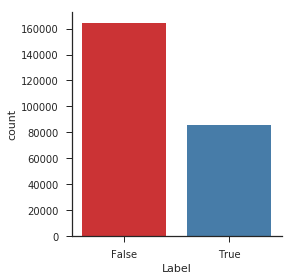

In [5]:
sns.factorplot(x='Label', kind='count', data=data)

Посмотрим как распределены признаки объектов в зависимости от их класса. Надо будет немного подождать :)

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


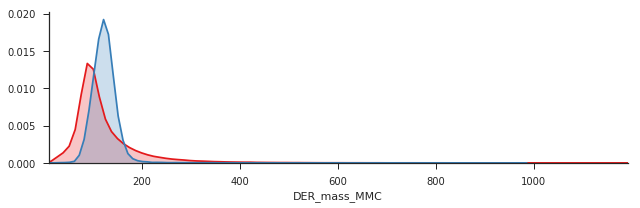

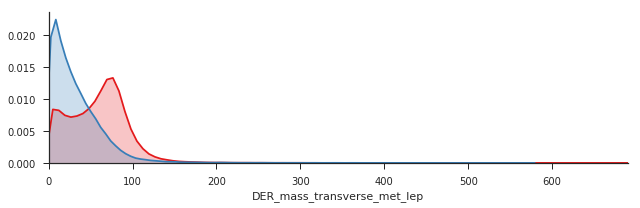

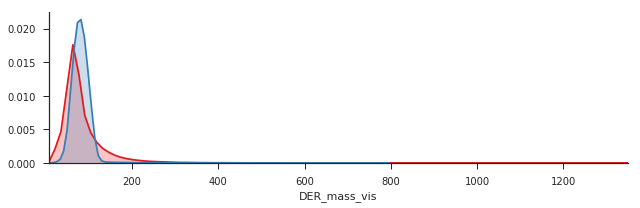

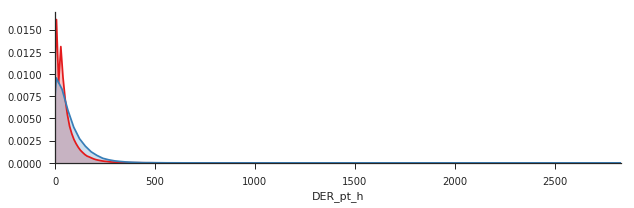

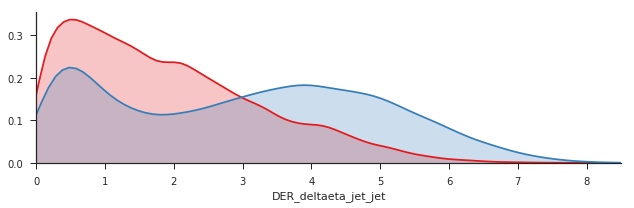

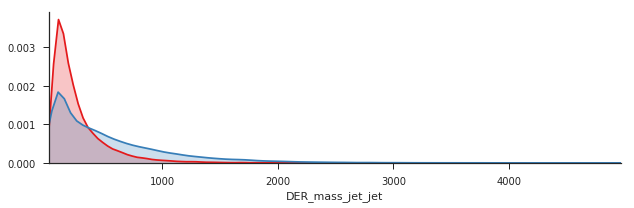

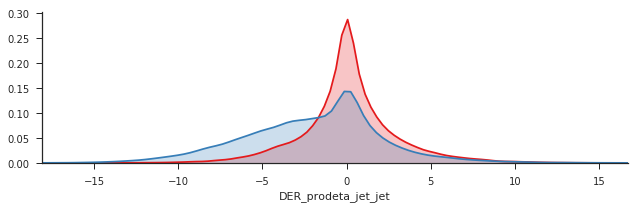

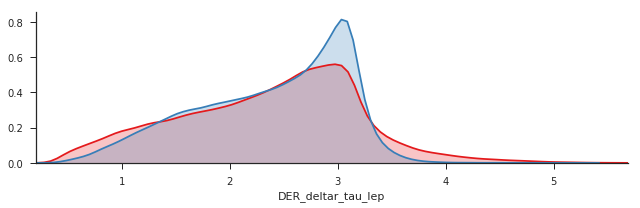

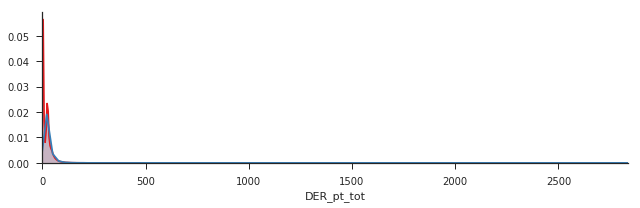

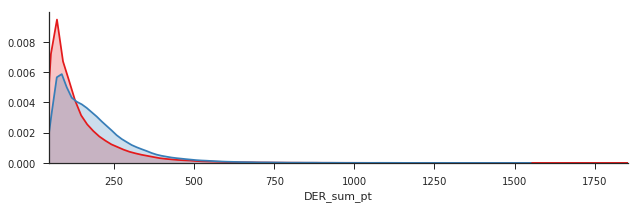

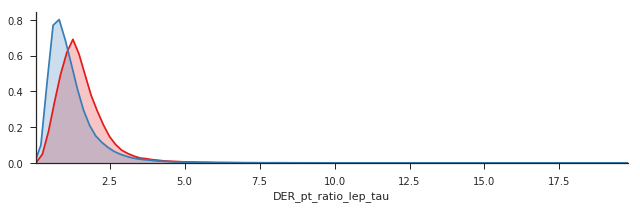

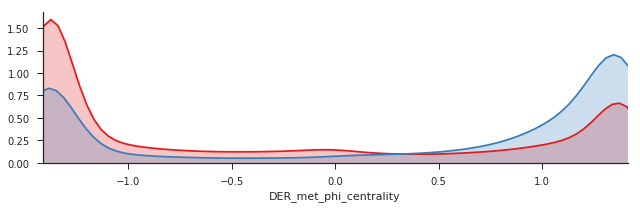

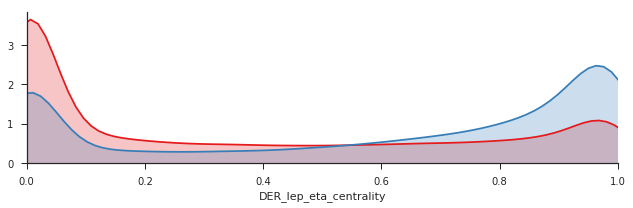

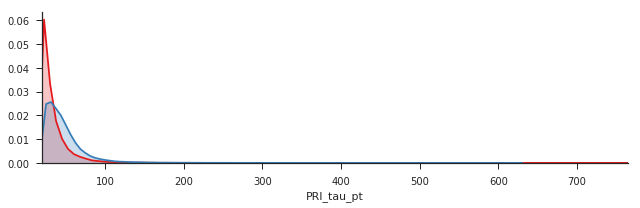

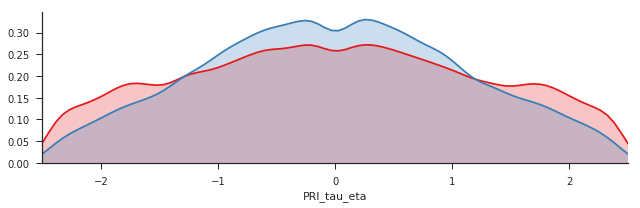

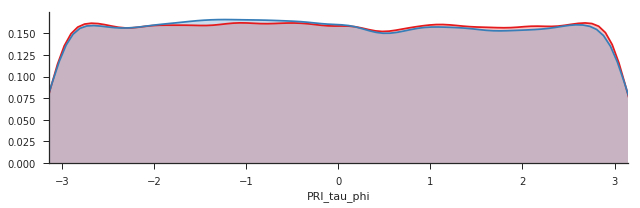

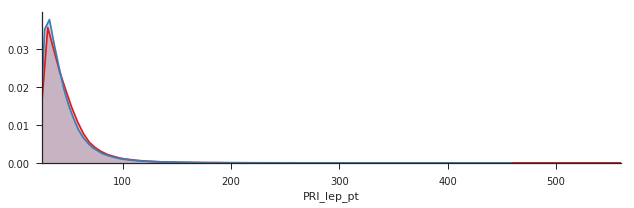

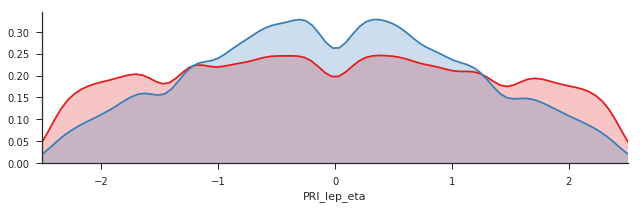

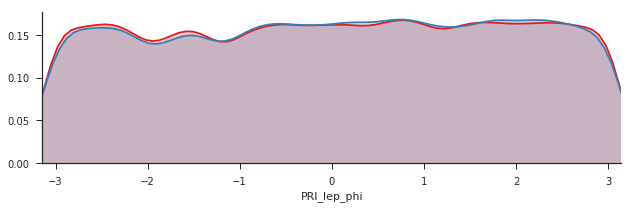

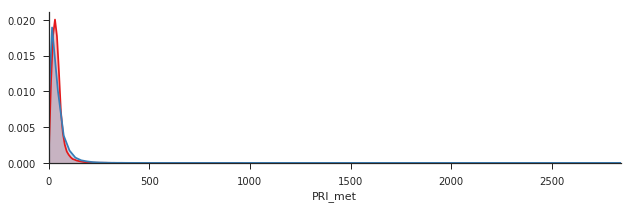

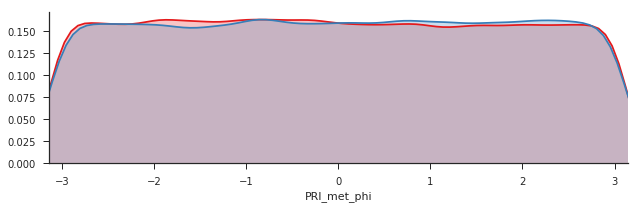

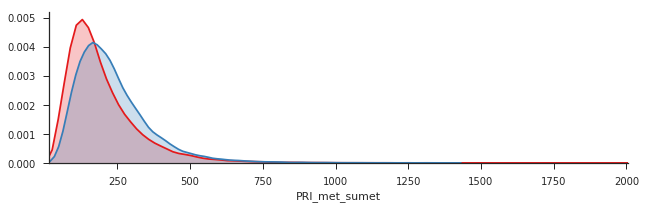

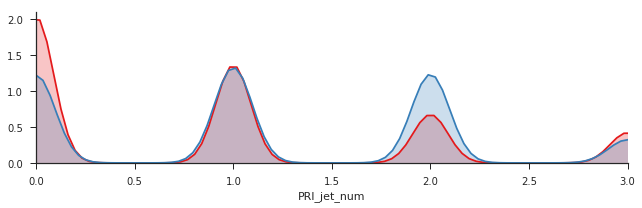

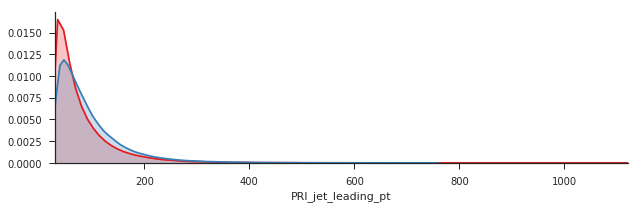

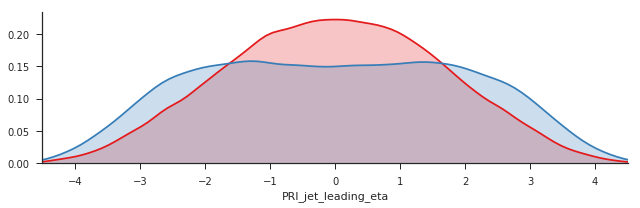

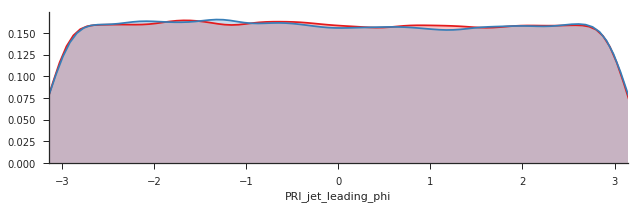

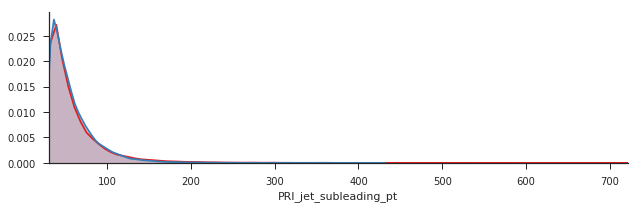

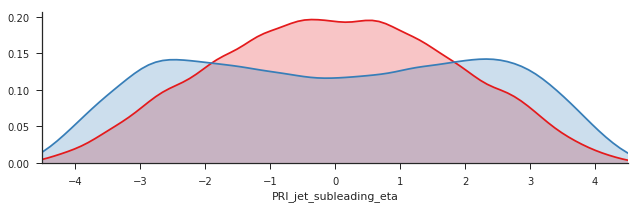

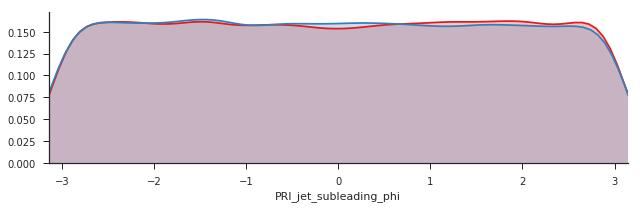

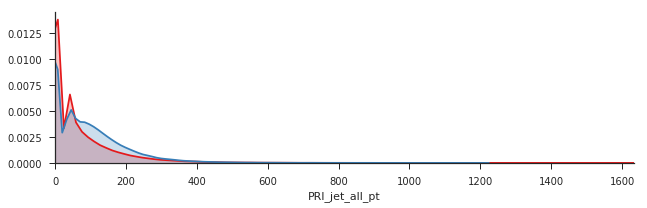

In [6]:
for feature in data.columns[:-2]:
    fg = sns.FacetGrid(data, hue='Label', aspect=3)
    fg.map(sns.kdeplot, feature, shade=True)
    fg.set(xlim=(data[feature].min(), data[feature].max()))

Выберем какие-нибудь интересные признаки, у которых распределение сильно отличается для разных классов и построим для них попарных зависимости.

In [7]:
data.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

Для дальнейшей обработки и отрисовки данных необходимо каким-либо образом избавиться от Nan-значений. Если удалить строки, то мы потеряем почти 3/4 данных, если удалить столбцы можем лишиться важных признаков. Поэтому заполним пустые значения медианами признаков.


In [15]:
data = data.fillna(data.median())

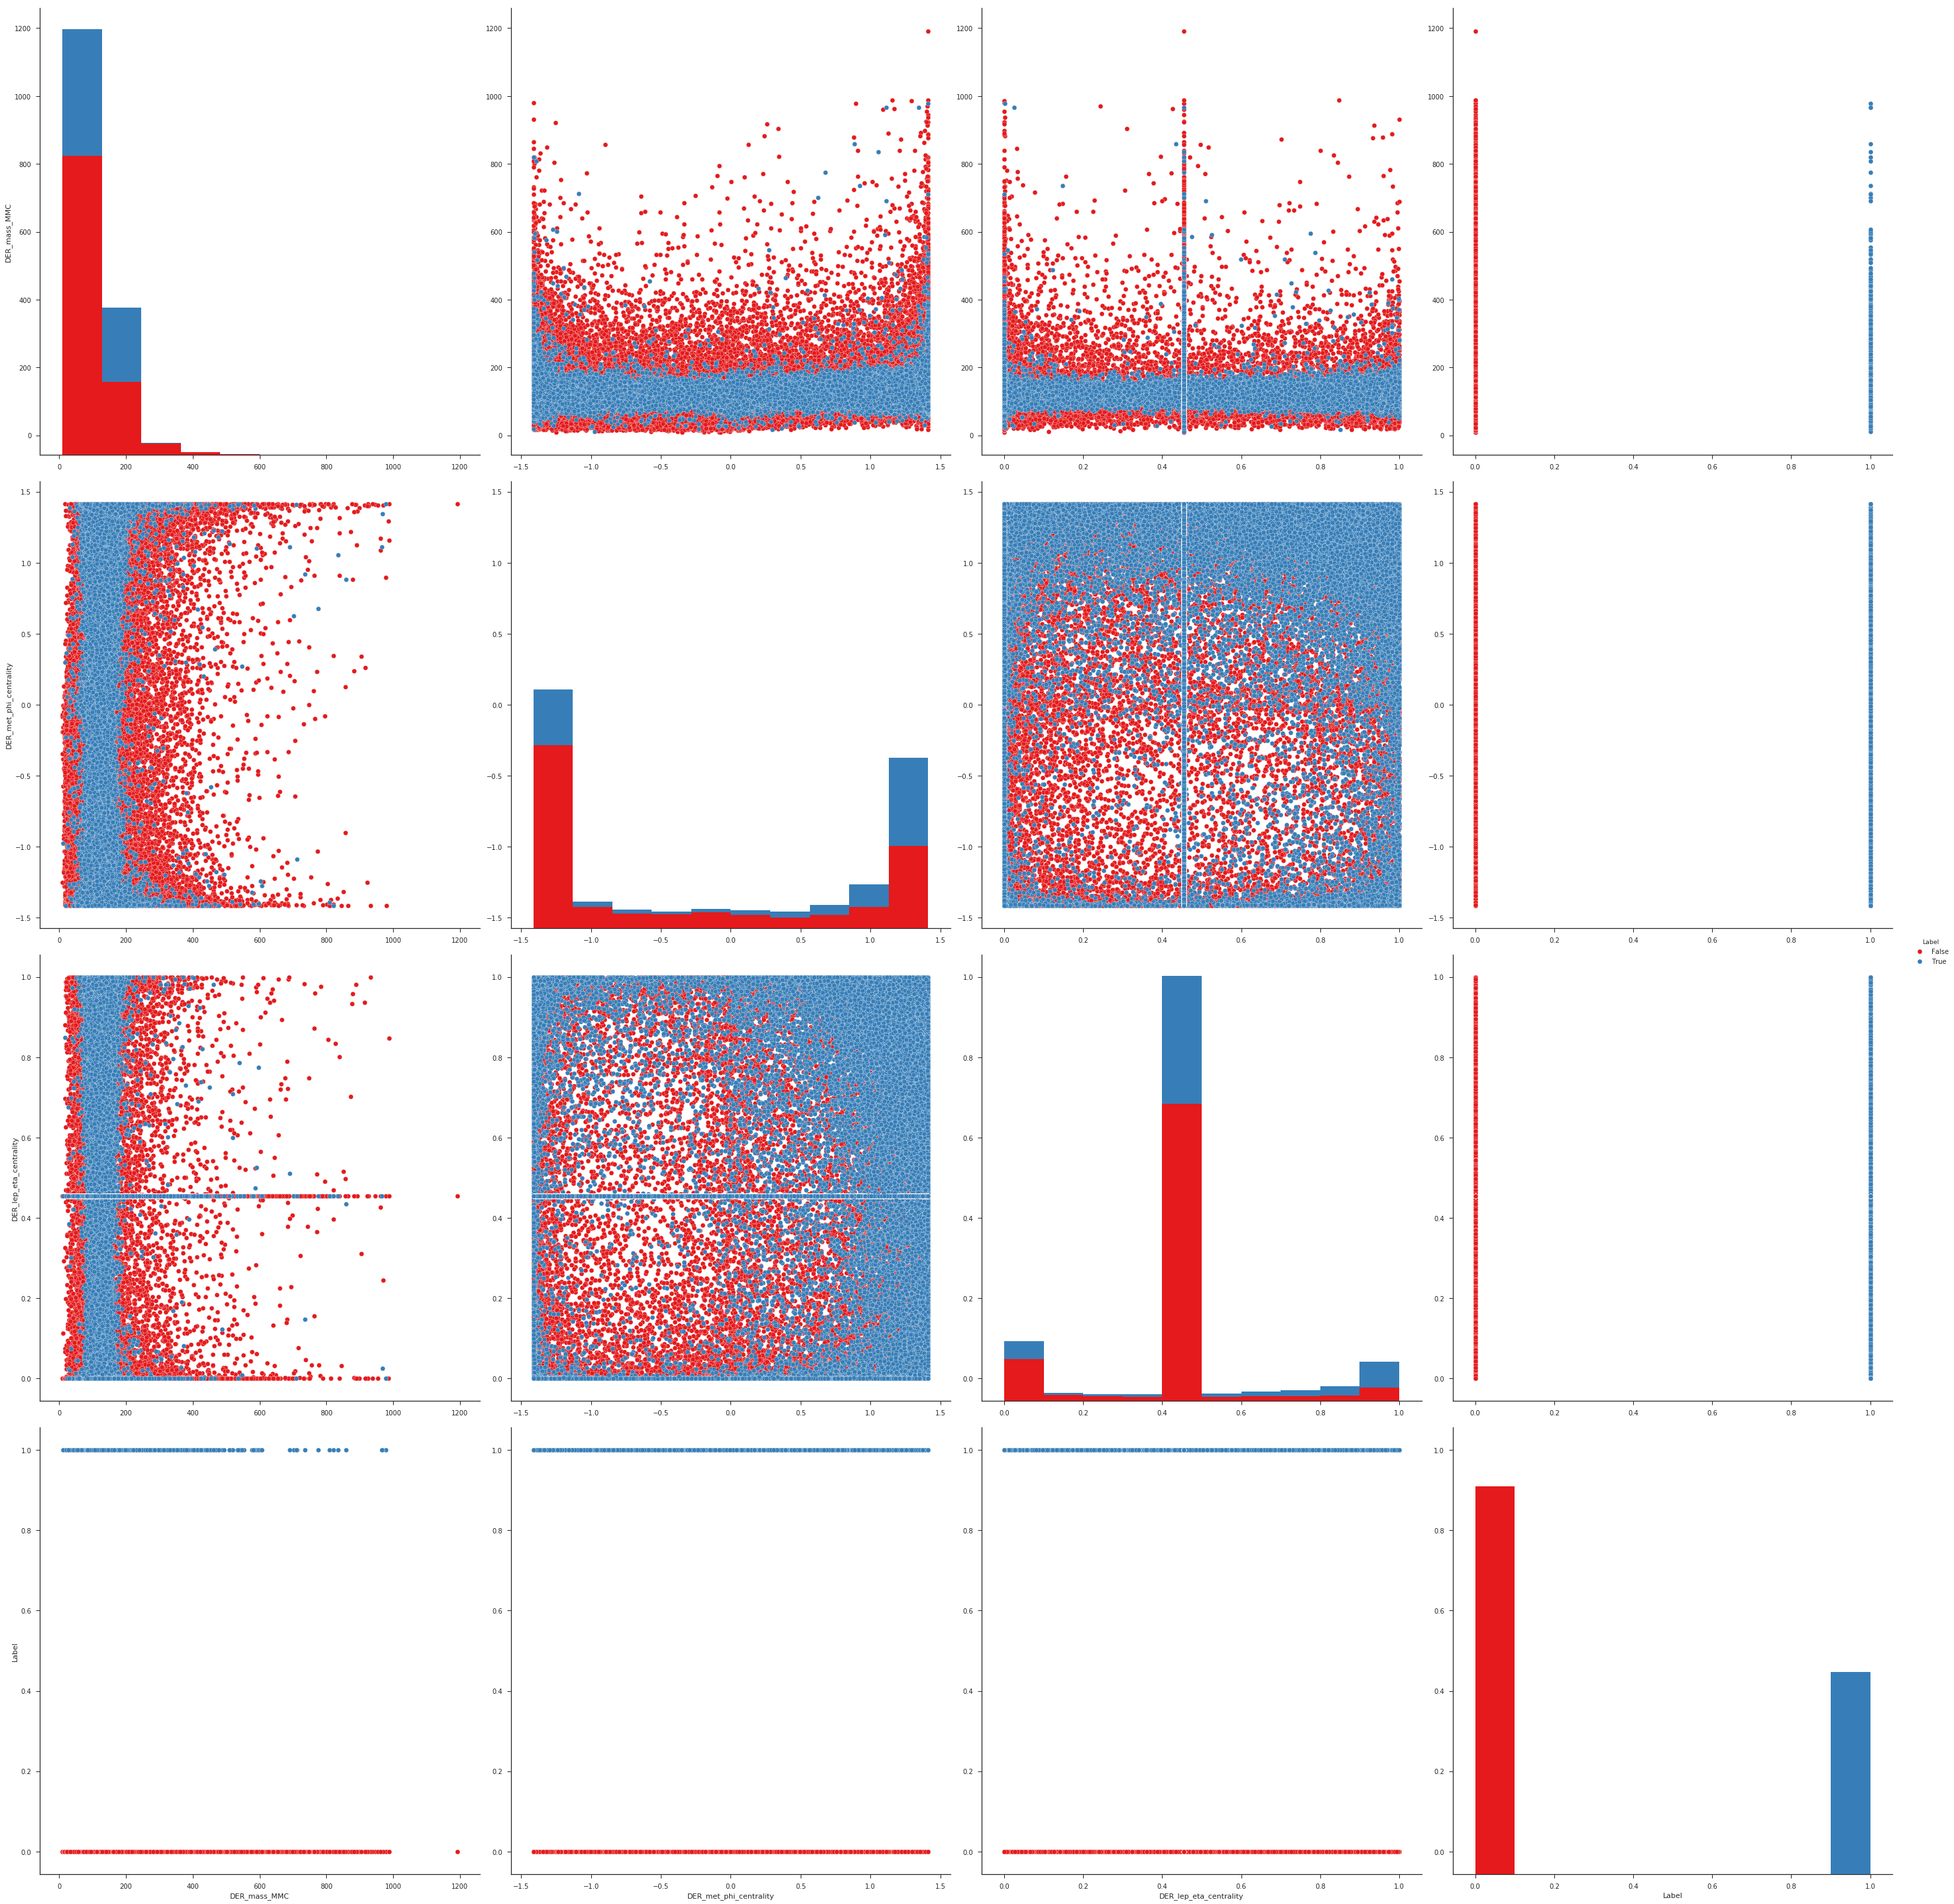

In [14]:
sns.pairplot(data.loc[:, ['DER_mass_MMC', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'Label']],
            hue='Label', size=10)

Видно, что в плоскости ('DER_met_phi_centrality', 'DER_lep_eta_centrality') классы не линейно разделимы, но зато можно попытаться разделить их используя их вторые степени. Добавим их в данные.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
new_f = pd.DataFrame(poly.fit_transform(data.loc[:, ['DER_met_phi_centrality',
                                                     'DER_lep_eta_centrality']].fillna(0)))

# чтобы применить PolyFeatures надо было заполнить нулями значения Nan, теперь вернем Nan обратно 
# (если в исходных данных и были нули, то их было немного и ничего, если мы их потеряем)
def toNan2(x):
    if x != 0:
        return x

new_f = new_f.applymap(toNan2)
new_f.head()

# теперь надо прилепить DataFrame к старому 
# (фич равный всегда 1 нам тоже не помешает, он пригодится для логрегрессии)
data[['0', '1', '2', '3', '4', '5']] = new_f

data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,0,1,2,3,4,5
EventId,,,,,,,,,,,,,,,,,,,,,
100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-2.475,113.497,0.002653,True,1.0,-0.963,0.454,0.927369,-0.437202,0.206116
100001,160.937,68.768,103.235,48.146,2.107,225.885,-0.244,3.473,2.078,125.157,...,-0.002,46.226,2.233584,False,1.0,1.407,0.454,1.979649,0.638778,0.206116
100002,112.406,162.172,125.953,35.635,2.107,225.885,-0.244,3.148,9.336,197.814,...,-0.002,44.251,2.347389,False,1.0,-1.235,0.454,1.525225,-0.560690,0.206116
100003,143.905,81.417,80.943,0.414,2.107,225.885,-0.244,3.310,0.414,75.968,...,-0.002,-0.000,5.446378,False,1.0,1.411,0.454,1.990921,0.640594,0.206116
100004,175.864,16.915,134.805,16.405,2.107,225.885,-0.244,3.891,16.405,57.983,...,-0.002,0.000,6.245333,False,1.0,-0.617,0.454,0.380689,-0.280118,0.206116


## Обучение моделей

### Метод k ближайших соседей

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X = data[list(data.columns[:30]) + list(data.columns[-6:])]
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X[::20], y[::20], test_size=0.1)

Text(0,0.5,'accuracy')

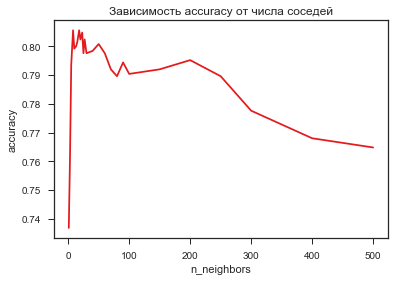

In [10]:
k_values = [1, 3, 5, 8, 10, 13, 15, 18, 20, 23, 25, 27, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 400, 500]
accuracy_values = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_values.append(accuracy_score(knn.predict(X_test), y_test))
    
plt.plot(k_values, accuracy_values)
plt.title('Зависимость accuracy от числа соседей')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
print('Accuracy = {}'.format(accuracy_score(y_true=y_test, y_pred=y_predicted)))

Accuracy = 0.8138


Из всех данных 2/3 объектов класса 0, поэтому если предсказывать всегда 0, то мы получим accuracy = 0.66, что, в принципе, достаточно существенно меньше чем 0.81, так что можно считать, что в этом случае accuracy достаточно показательная метрика качества. Но все равно можно посмотреть, какое качество нашей модели в других метриках.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_predicted))

             precision    recall  f1-score   support

      False       0.84      0.88      0.86     16454
       True       0.75      0.68      0.71      8546

avg / total       0.81      0.81      0.81     25000



Как видно, мы отсеяли 88% ложных сигналов (False_recall - это доля правильных ответов для одного класса 0, т.е. true_negative / (true_negative + false_positive) = 0.88), что звучит неплохо. Плохо, что мы потеряли почти треть реальных сигналов (True_recall = 0.68). 

Precision, т.е. доля правильных в том, что мы предсказали как 1 (или как 0) в обоих случаях достаточно неплохой (учитывая, что предсказание все нулевым классом дало бы False_presicion = 0.66, а True_presision в этом случае стоило бы положить равным 0).

### Логистическая регрессия

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

Здесь тоже надо что-то сделать с пустыми значениями. Попробуем удалить их или снова заполнить медианами.

In [14]:
X = data[list(data.columns[:30]) + list(data.columns[-6:])]
y = data['Label']

In [91]:
logreg = LogisticRegression()

kf = KFold(n_splits=5)
accuracy = 0
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    logreg.fit(X_train, y_train)
    accuracy += accuracy_score(logreg.predict(X_test), y_test)
accuracy /= 5
print('Accuracy = {}'.format(accuracy))

TRAIN: [1845 1846 1847 ... 9219 9220 9221] TEST: [   0    1    2 ... 1842 1843 1844]
TRAIN: [   0    1    2 ... 9219 9220 9221] TEST: [1845 1846 1847 ... 3687 3688 3689]
TRAIN: [   0    1    2 ... 9219 9220 9221] TEST: [3690 3691 3692 ... 5531 5532 5533]
TRAIN: [   0    1    2 ... 9219 9220 9221] TEST: [5534 5535 5536 ... 7375 7376 7377]
TRAIN: [   0    1    2 ... 7375 7376 7377] TEST: [7378 7379 7380 ... 9219 9220 9221]
Accuracy = 0.7263050749813355


Можно сравнить, что добавление 6 признаков (в том числе единичного) не добавляют точности предсказания, что говорит скорее всего о том, что данные просто совершенно не линейно разделимы (если еще учесть, что предсказание одним классом дает почти такой же accuracy), поэтому логистическая регрессия в этом случае $-$ не самый лучший метод.

### Случайный лес

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [31]:
randfor = RandomForestClassifier(n_estimators=50, max_depth=10)

# будем обучаться на тех же X и y, что уже есть
cv_quality = cross_val_score(randfor, X, y, scoring='roc_auc')
print("ROC_AUC: {}".format(cv_quality.mean()))

ROC_AUC: 0.8982058048355878


Random forest возвращает вектор вероятностей. Изменяя параметр $p$, который определяет решающее правило: $\mathbb{P}(y = 1 \mid x) > p \Rightarrow y(x) = 1$, иначе $0$, мы можем построить ROC-кривую и посчитать ROC-AUC. Видим, что в этой метрике качество модели очень хорошее. Это можно объяснить тем, что данные устроены достаточно сложно, в них есть много "не геометрических зависимостей", которые достаточно хорошо улавливаются решающими правилами.

## Выводы

KNN показал относительно неплохое качество в разных метриках, потому что, по-моему, это вообще довольно стабильный алгоритм и сложно придумать адекватные данные, на которых он давал бы совсем плохое качество.

Логистическая регрессия показала плохое качество, потому что данные не линейно разделимы.

Случайный лес дает хорошее качество в достаточно объективной метрике ROC_AUC (кстати он дает более менее неплохой скор 2.8 и в метрике c каггла). По-моему, это объсняется хорошей адаптируемостью алгоритма под данные со сложными закономерностями.

## 1
Неформальное описание - с Kaggle'а

Дано - trainset из 250000 элементов
Найти - лэйблы для testset из 550000 элементов
Критерий - accuracy, precision, recall, f1_score, roc_auc

Структура входных/выходных данных - csv файл

## 2
Простое решение - K-NearestNeighbours (http://scikit-learn.org/stable/modules/neighbors.html)

## 3
Основное решение - случайный лес
Модель - RandomForestClassifier
Метод - CrossValidation
Источник - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## 4
Проводилось 3 эксперимента: с KNN, логистической регрессией и случайным лесом.

KNN показал относительно неплохое качество в разных метриках, потому что, по-моему, это вообще довольно стабильный алгоритм и сложно придумать адекватные данные, на которых он давал бы совсем плохое качество. Здесь проверялись следующие критерии качества: $\textbf{accuracy}, \textbf{precision}, \textbf{recall}$ и $\textbf{f1_score}$

Логистическая регрессия показала плохое качество, потому что данные не линейно разделимы. Используемый критерий качество - $\textbf{accuracy}$.

Случайный лес дает хорошее качество в достаточно объективной метрике ROC_AUC (кстати он дает более менее неплохой скор 2.8 и в метрике c каггла). По-моему, это объсняется хорошей адаптируемостью алгоритма под данные со сложными закономерностями. Используемый критерий качество - $\textbf{roc_auc}$.

## 5
Зависимость качества KNN от количества соседей представлена на графике ниже.

<img src="Plot.png"></img>

## 6

Случайный лес показал себя очень хорошо - эта модель хорошо подстраивается под сложные зависимости между данными.

Линейная регрессия отработала хуже всего - из-за того, что данные линейно плохо разделимы

## Ссылка на репозиторий

https://vk.com/away.php?to=https%3A%2F%2Fgithub.com%2FZilberoman%2FML&cc_key=

## Используемые материалы

KNearestNeighbours - http://scikit-learn.org/stable/modules/neighbors.html

LogRegression - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html